In [1]:
import os

from vis import (
    fpr_allpi, policies_timeseries, 
    heatmaps_and_convergence_check,
    many_measure_vs_subparams
)
from experiment_data import ExperimentData

# Sensitivity checking

Based on feedback from colleagues we decided to test whether an alternative selection algorithm we'll call "Wright-Fisher" for now, though it may be a Moran process more specifically. We also decided to do the experiment with a base rate of 0.5 to see that the results are qualitatively the same.

# Wright-Fisher $b=0.1$

## False discovery rate and mean false positive rate

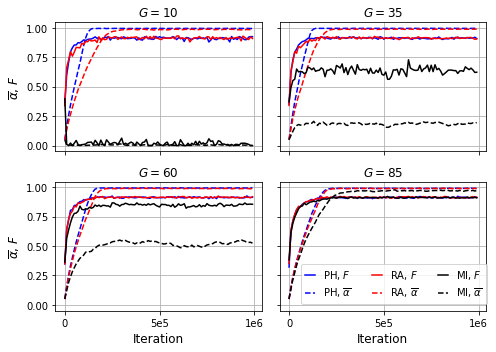

In [2]:
figure_dir = '/Users/mt/workspace/papers/sciencefunding/Figures/sensitivity-wright-fisher'

ed = ExperimentData('pubdata/sensitivity/scimod-wright-fisher.hdf')
policies_timeseries(ed, 
    save_path=os.path.join(figure_dir, 'meas_v_time.pdf')
)

## Figures 3 and 4

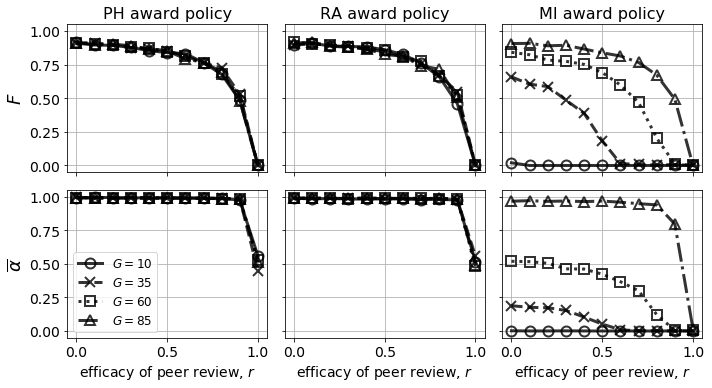

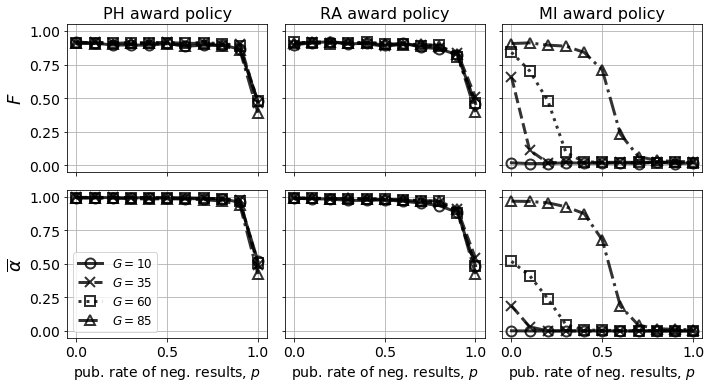

In [3]:
many_measure_vs_subparams(ed, 
    save_path=os.path.join(figure_dir, 'meas_v_fpdr.pdf')
)
many_measure_vs_subparams(ed, param='NPR', 
    save_path=os.path.join(figure_dir, 'meas_v_npr.pdf')
)

## Heatmaps

In [4]:
from vis import heatmaps

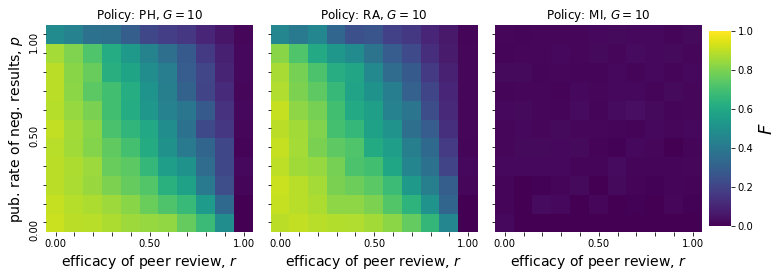

In [5]:
heatmaps(ed, '10', 
    save_path=os.path.join(figure_dir, 'heatmaps-10-fdr.pdf'), figsize=(10, 6)
)

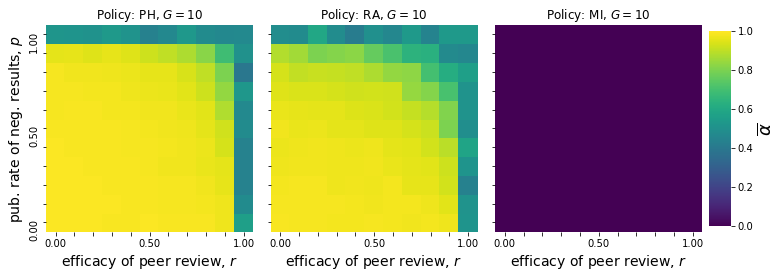

In [6]:
heatmaps(ed, '10', measure='falsePositiveRate',
    save_path=os.path.join(figure_dir, 'heatmaps-10-fpr.pdf'), figsize=(10, 6)
)

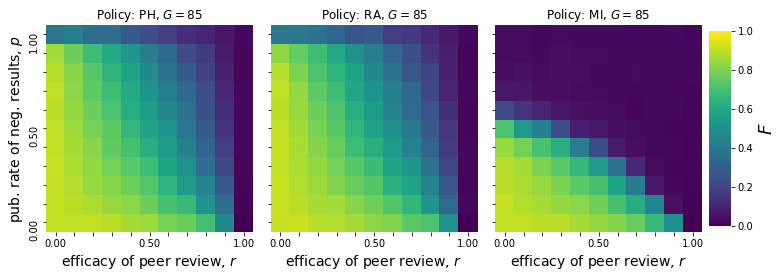

In [7]:
heatmaps(ed, '85', 
save_path=os.path.join(figure_dir, 'heatmaps-85-fdr.pdf'), figsize=(10, 6))

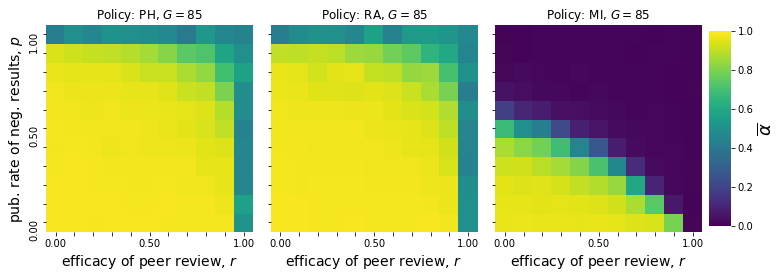

In [8]:
heatmaps(ed, '85', measure='falsePositiveRate',
save_path=os.path.join(figure_dir, 'heatmaps-85-fpr.pdf'), 
figsize=(10, 6))

## Number of publications decreases with $r$

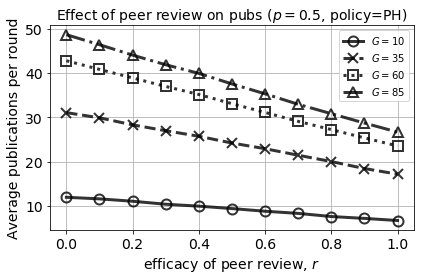

In [9]:
# policy = 'FPR'; award_amount = 10; pubneg_rate = '0.0'; fpdr = '0.10'
# measures = ed[policy, award_amount, pubneg_rate, fpdr]
# print(list(measures.keys()))

# mp = measures['meanPublications'][-1, :].mean()
from vis import measure_vs_pubparams
measure_vs_pubparams(ed, param='FPDR', 
                     measure='meanPublications', other_val='0.50')
plt.xlabel('')
plt.xticks(range(0, 11, 2), ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.xlabel(r'efficacy of peer review, $r$', size=14)
plt.legend()
plt.ylabel('Average publications per round', size=14)
plt.title(r'Effect of peer review on pubs ($p=0.5$, policy=PH)', size=14)
plt.savefig(os.path.join(figure_dir, 'pubs_v_peer-rev-eff-PH.pdf'))

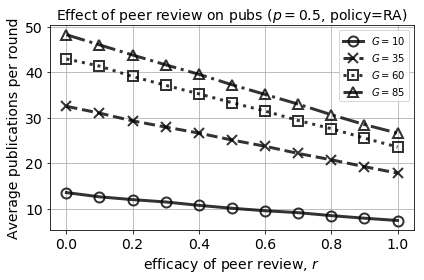

In [10]:
from vis import measure_vs_pubparams
measure_vs_pubparams(ed, param='FPDR', policy='RANDOM',
                     measure='meanPublications', other_val='0.50')
plt.xlabel('')
plt.xticks(range(0, 11, 2), ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.xlabel(r'efficacy of peer review, $r$', size=14)
plt.legend()
plt.ylabel('Average publications per round', size=14)
plt.title(r'Effect of peer review on pubs ($p=0.5$, policy=RA)', size=14)
plt.savefig(os.path.join(figure_dir, 'pubs_v_peer-rev-eff-RA.pdf'))

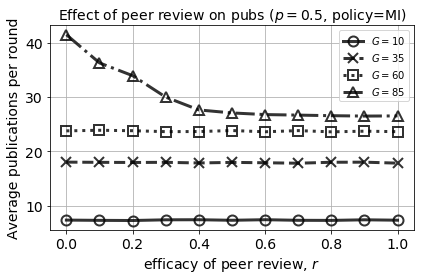

In [11]:
from vis import measure_vs_pubparams
measure_vs_pubparams(ed, param='FPDR', policy='FPR',
                     measure='meanPublications', other_val='0.50')
plt.xlabel('')
plt.xticks(range(0, 11, 2), ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.xlabel(r'efficacy of peer review, $r$', size=14)
plt.legend()
plt.ylabel('Average publications per round', size=14)
plt.title(r'Effect of peer review on pubs ($p=0.5$, policy=MI)', size=14)
plt.savefig(os.path.join(figure_dir, 'pubs_v_peer-rev-eff-MI.pdf'))

# Temporal Dynamics

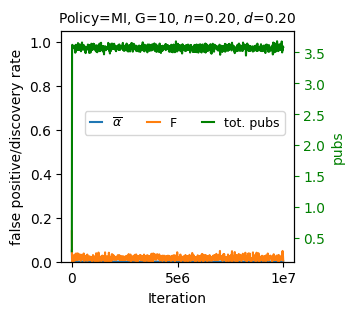

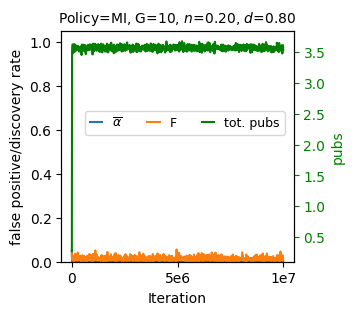

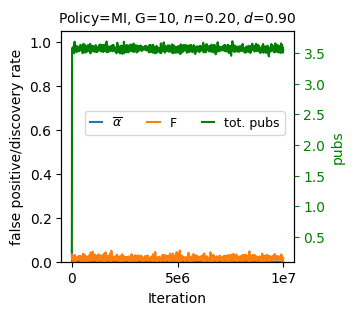

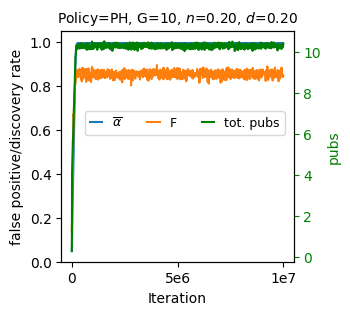

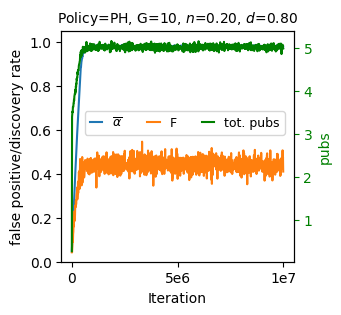

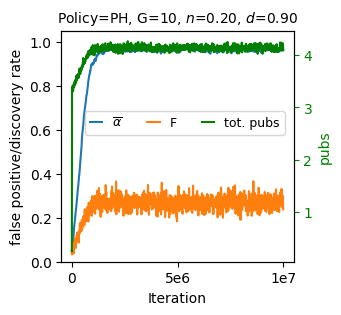

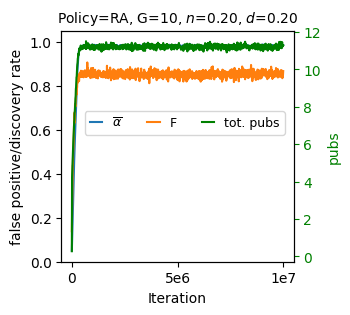

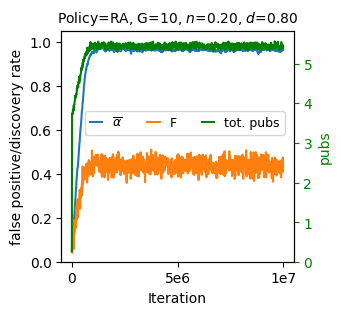

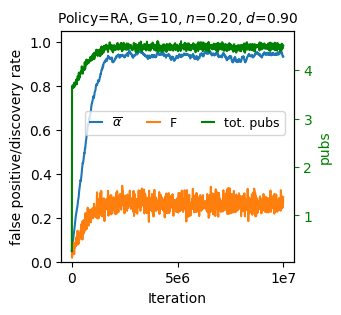

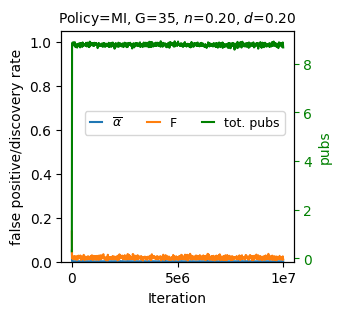

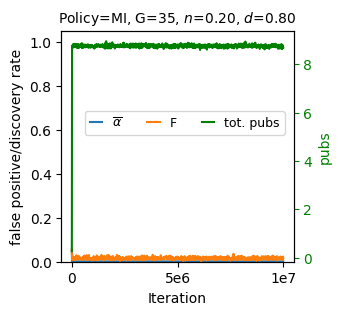

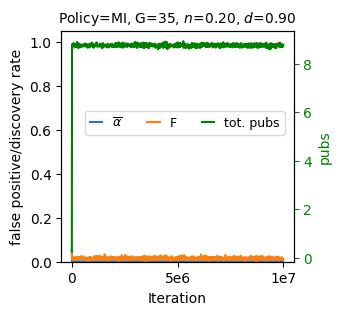

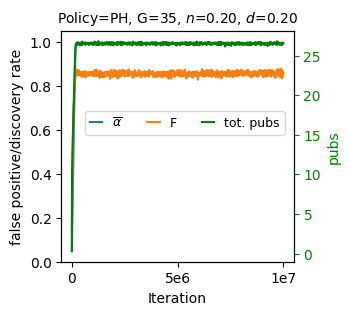

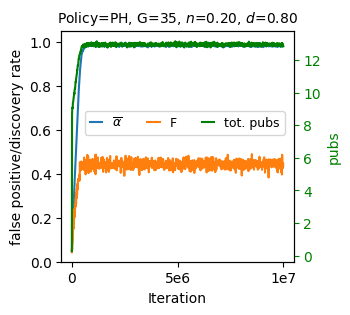

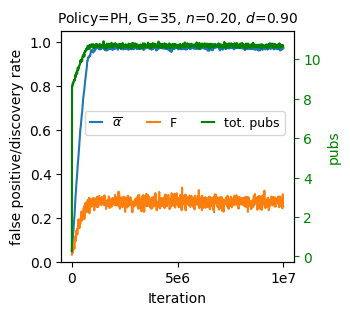

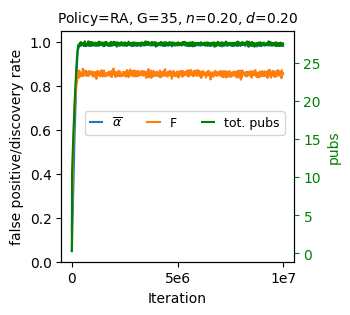

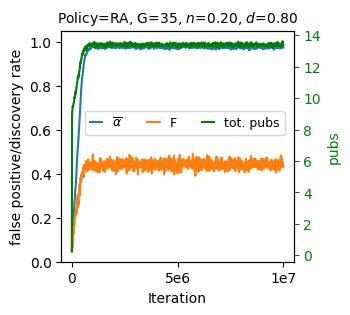

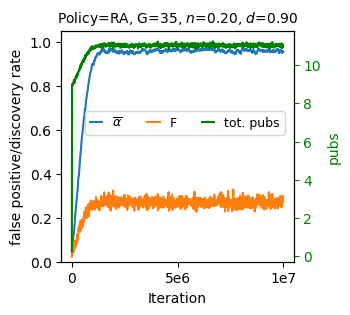

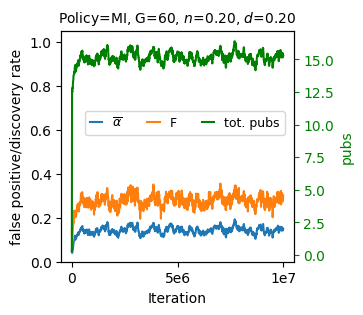

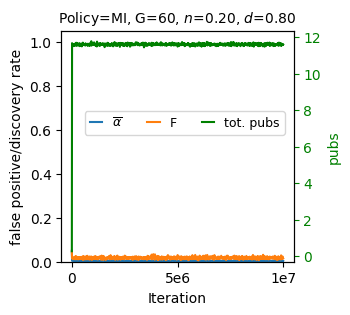

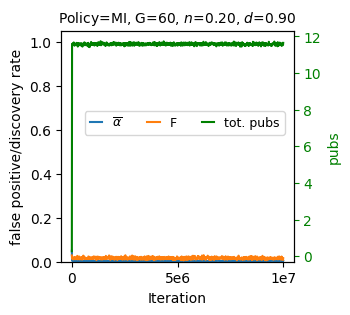

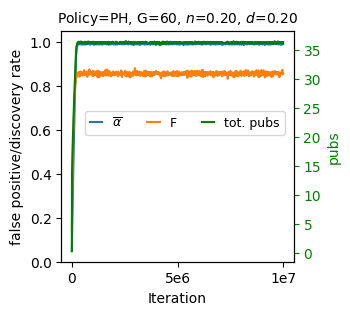

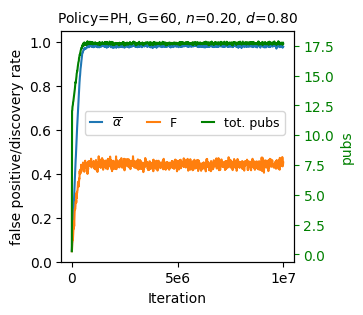

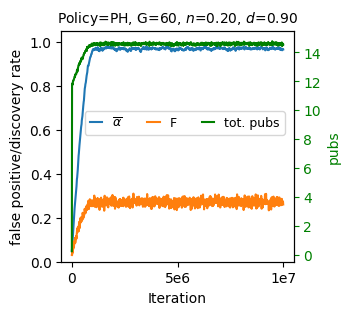

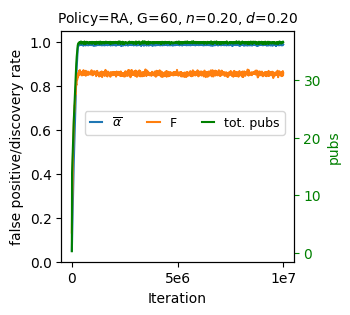

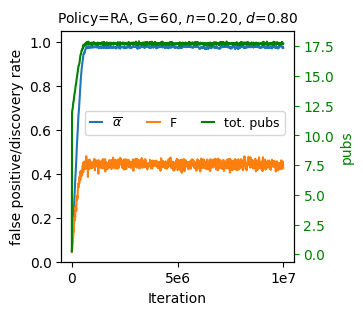

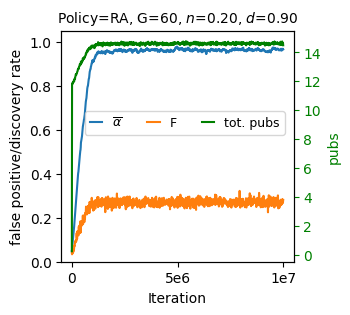

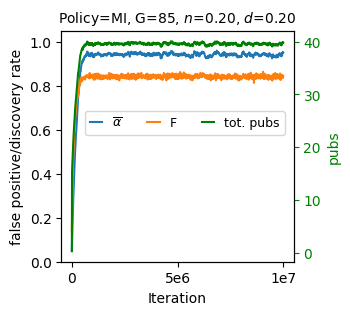

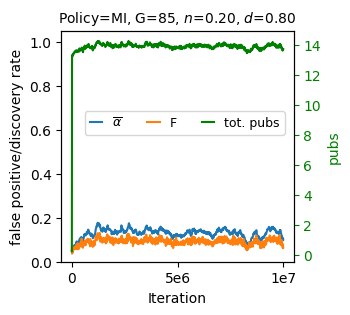

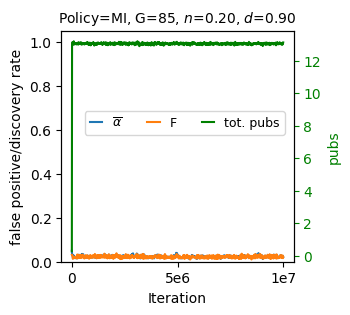

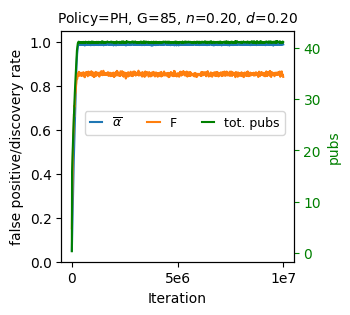

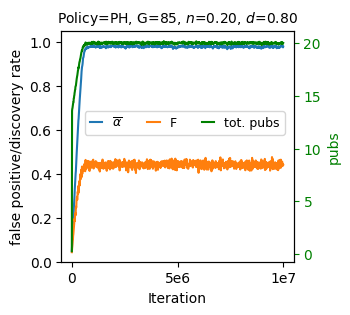

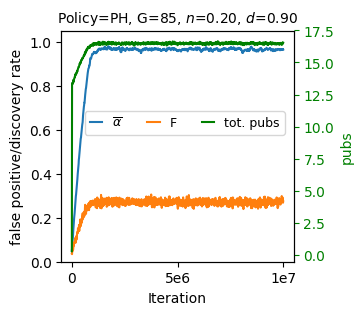

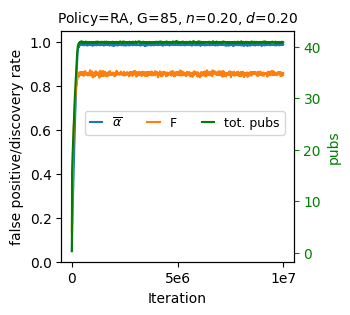

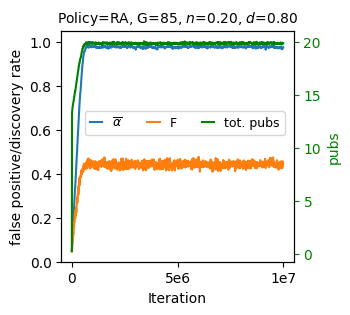

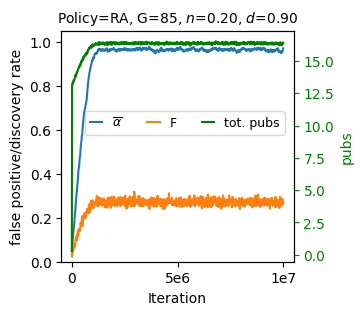

In [12]:
ed.hdf.close()
ed = ExperimentData('pubdata/sensitivity/scimod-wright-fisher.hdf')
heatmaps_and_convergence_check(ed, save_dir=os.path.join(figure_dir, 'TemporalDynamics')) 

# Wright-Fisher $b=0.5$

## False discovery rate and mean false positive rate

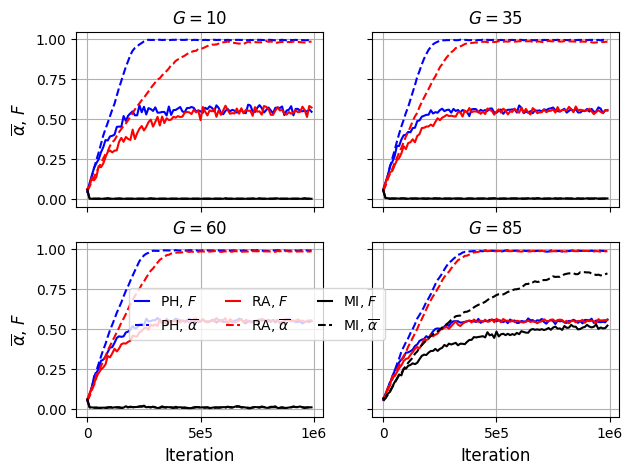

In [13]:
figure_dir = '/Users/mt/workspace/papers/sciencefunding/Figures/sensitivity-wright-fisher-b=0.5/'

ed = ExperimentData('pubdata/sensitivity/scimod-wright-fisher-b=0.5.hdf')
policies_timeseries(ed, 
    save_path=os.path.join(figure_dir, 'meas_v_time.pdf')
)

## Figures 3 and 4

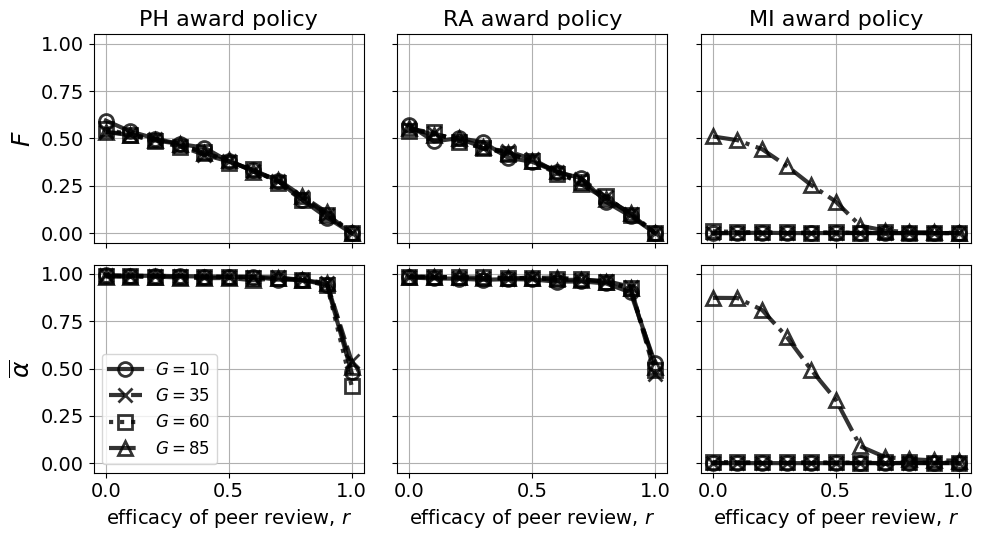

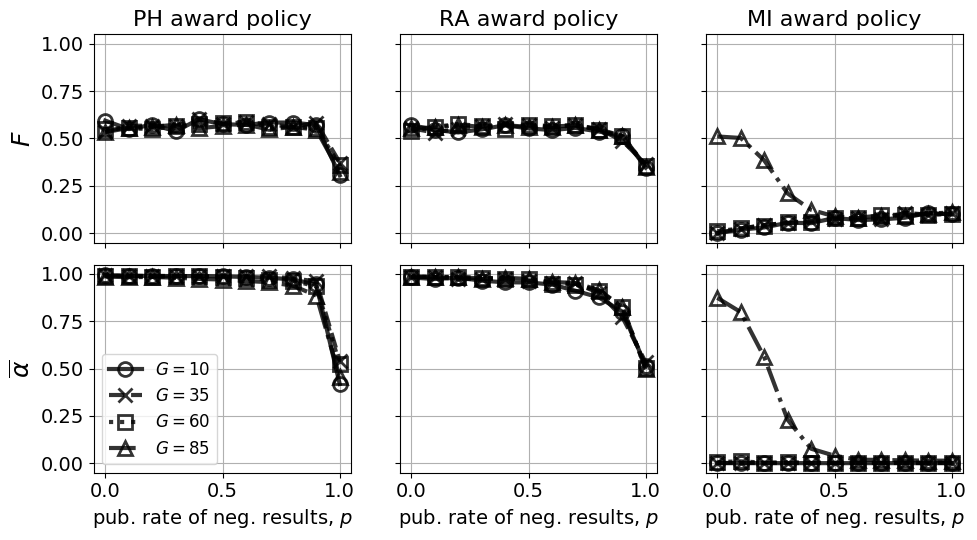

In [14]:
many_measure_vs_subparams(ed, 
    save_path=os.path.join(figure_dir, 'meas_v_fpdr.pdf')
)
many_measure_vs_subparams(ed, param='NPR', 
    save_path=os.path.join(figure_dir, 'meas_v_npr.pdf')
)

I think that the false discovery rate goes up as more negative results are published because more negative results are false negative results when the base rate is higher.

## Heatmaps

In [15]:
from vis import heatmaps

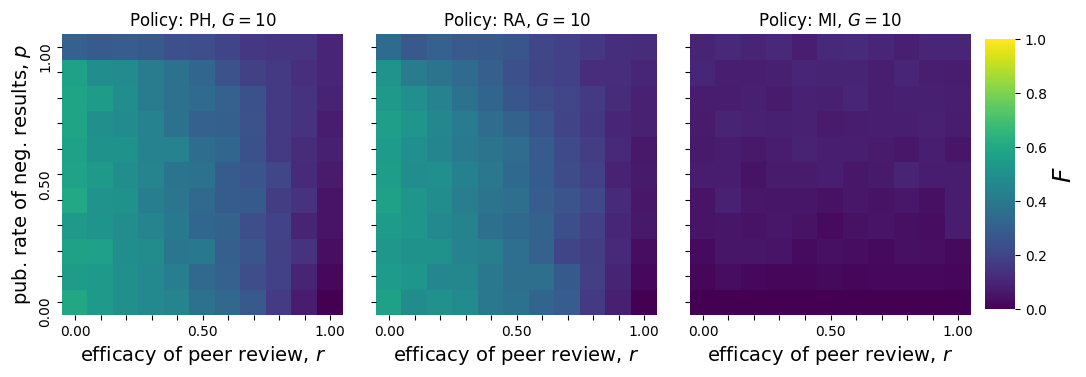

In [16]:
heatmaps(ed, '10', 
    save_path=os.path.join(figure_dir, 'heatmaps-10-fdr.pdf'), figsize=(10, 6)
)

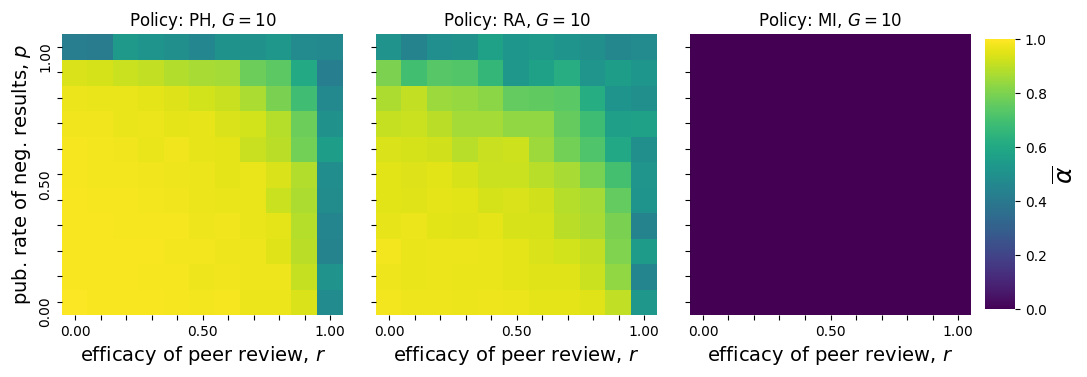

In [17]:
heatmaps(ed, '10', measure='falsePositiveRate',
    save_path=os.path.join(figure_dir, 'heatmaps-10-fpr.pdf'), figsize=(10, 6)
)

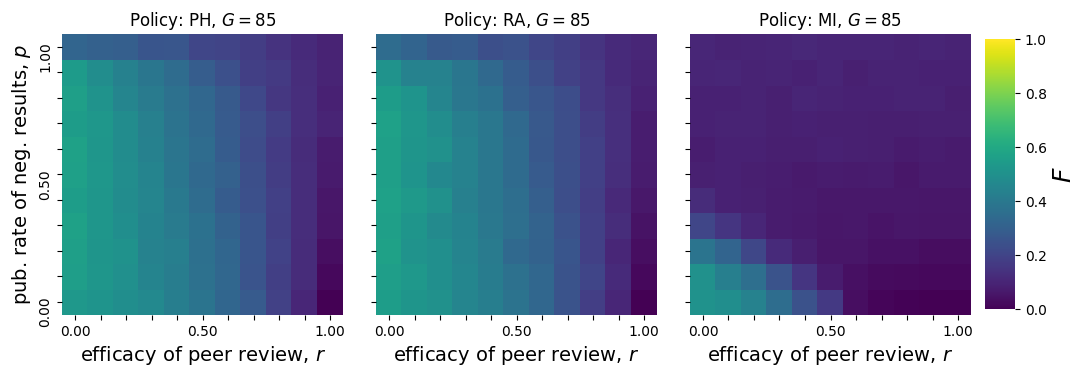

In [18]:
heatmaps(ed, '85', 
save_path=os.path.join(figure_dir, 'heatmaps-85-fdr.pdf'), figsize=(10, 6))

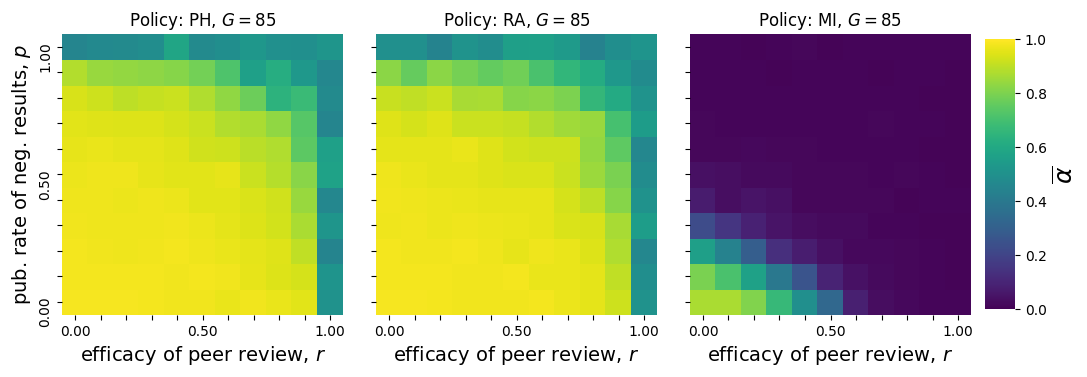

In [19]:
heatmaps(ed, '85', measure='falsePositiveRate',
save_path=os.path.join(figure_dir, 'heatmaps-85-fpr.pdf'), 
figsize=(10, 6))

Here there is no reason for the false positive rate to increase if peer review is better than the base rate under the methodological integrity policy.

## Number of publications decreases with $r$

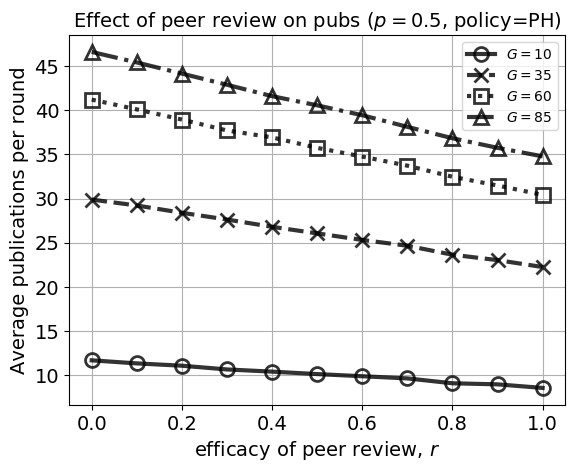

In [20]:
# policy = 'FPR'; award_amount = 10; pubneg_rate = '0.0'; fpdr = '0.10'
# measures = ed[policy, award_amount, pubneg_rate, fpdr]
# print(list(measures.keys()))

# mp = measures['meanPublications'][-1, :].mean()
from vis import measure_vs_pubparams
measure_vs_pubparams(ed, param='FPDR', 
                     measure='meanPublications', other_val='0.50')
plt.xlabel('')
plt.xticks(range(0, 11, 2), ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.xlabel(r'efficacy of peer review, $r$', size=14)
plt.legend()
plt.ylabel('Average publications per round', size=14)
plt.title(r'Effect of peer review on pubs ($p=0.5$, policy=PH)', size=14)
plt.savefig(os.path.join(figure_dir, 'pubs_v_peer-rev-eff-PH.pdf'))

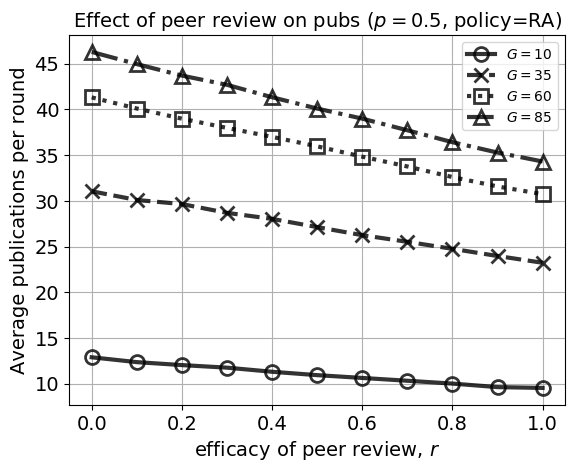

In [21]:
from vis import measure_vs_pubparams
measure_vs_pubparams(ed, param='FPDR', policy='RANDOM',
                     measure='meanPublications', other_val='0.50')
plt.xlabel('')
plt.xticks(range(0, 11, 2), ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.xlabel(r'efficacy of peer review, $r$', size=14)
plt.legend()
plt.ylabel('Average publications per round', size=14)
plt.title(r'Effect of peer review on pubs ($p=0.5$, policy=RA)', size=14)
plt.savefig(os.path.join(figure_dir, 'pubs_v_peer-rev-eff-RA.pdf'))

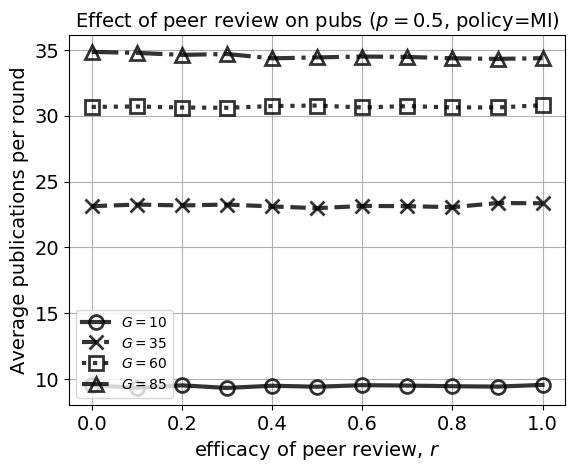

In [22]:
from vis import measure_vs_pubparams
measure_vs_pubparams(ed, param='FPDR', policy='FPR',
                     measure='meanPublications', other_val='0.50')
plt.xlabel('')
plt.xticks(range(0, 11, 2), ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.xlabel(r'efficacy of peer review, $r$', size=14)
plt.legend()
plt.ylabel('Average publications per round', size=14)
plt.title(r'Effect of peer review on pubs ($p=0.5$, policy=MI)', size=14)
plt.savefig(os.path.join(figure_dir, 'pubs_v_peer-rev-eff-MI.pdf'))

# Temporal Dynamics

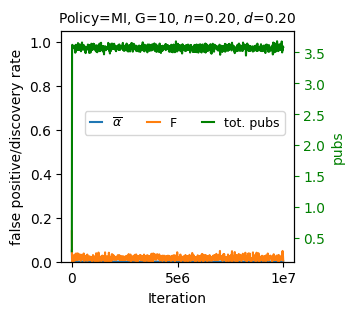

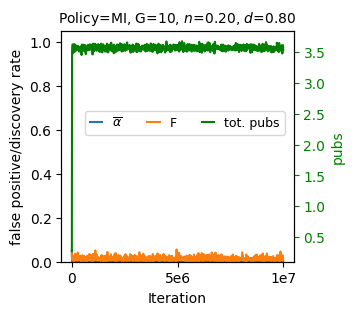

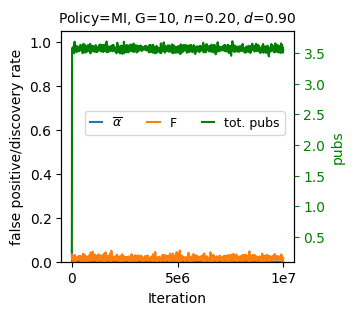

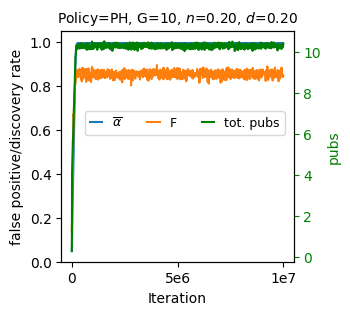

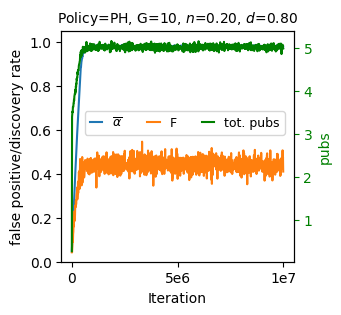

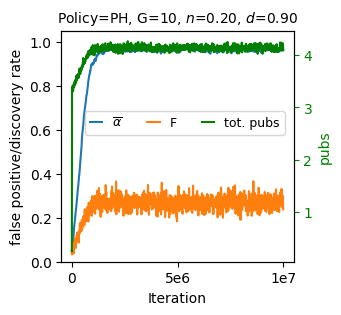

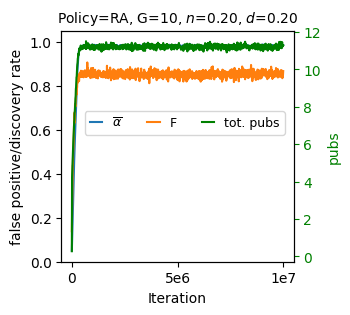

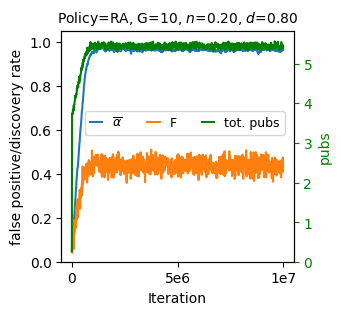

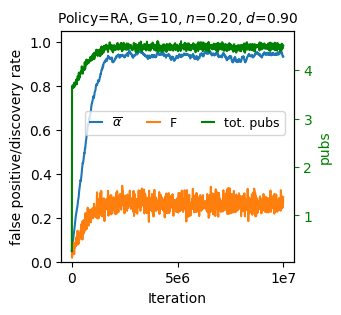

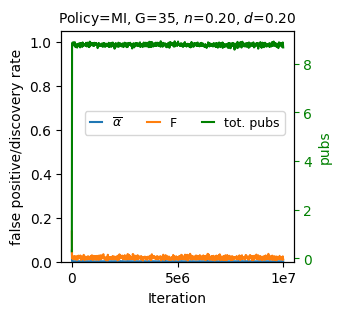

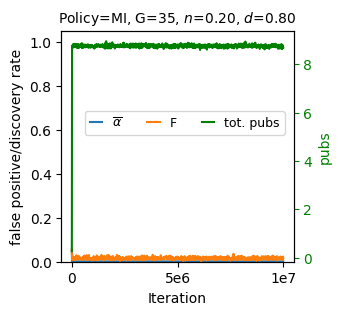

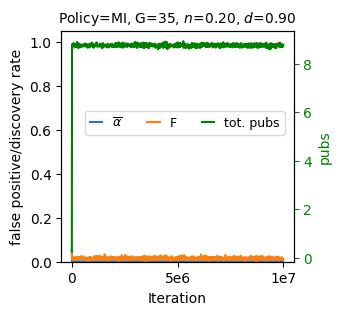

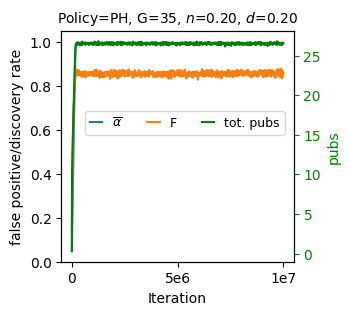

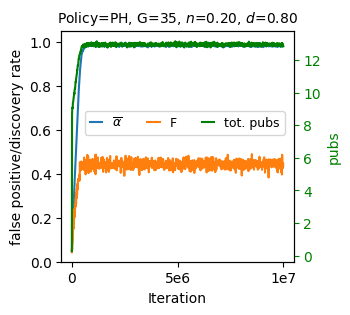

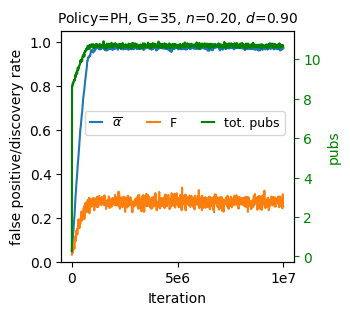

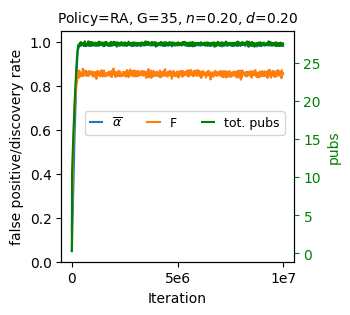

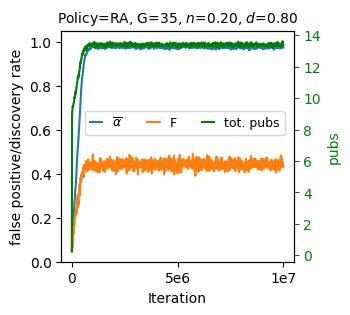

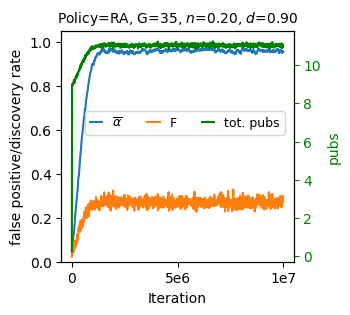

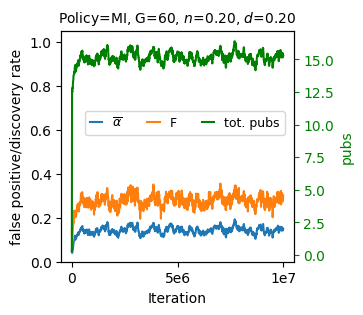

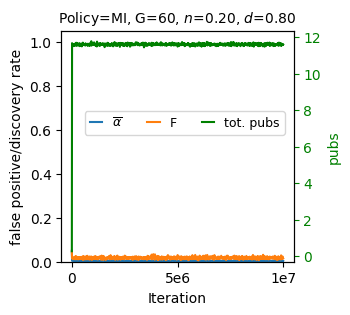

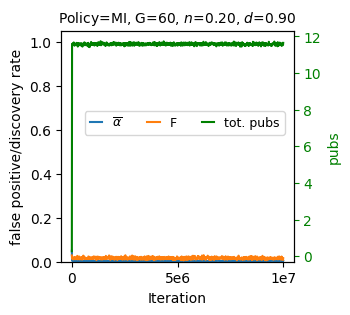

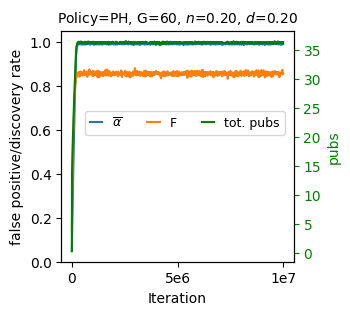

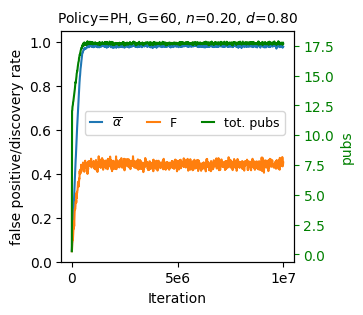

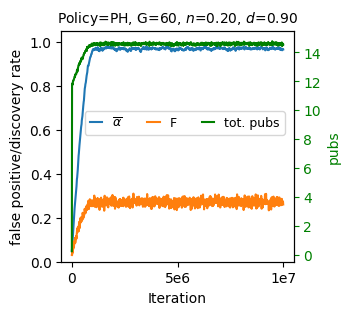

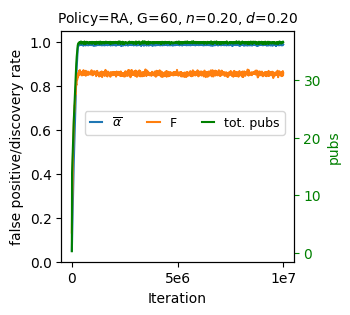

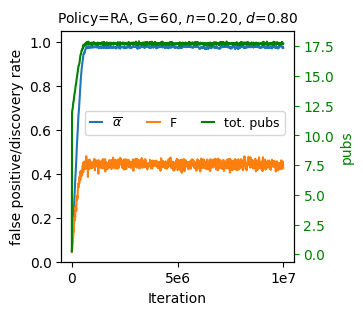

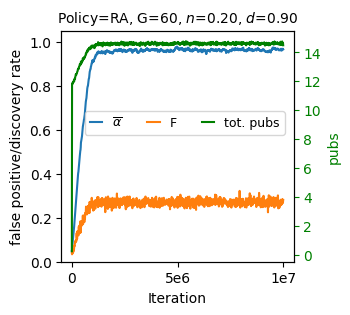

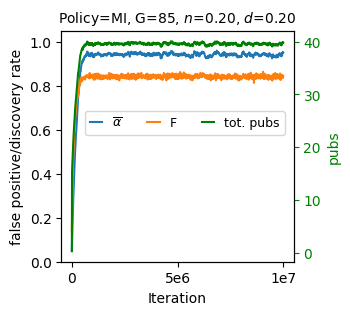

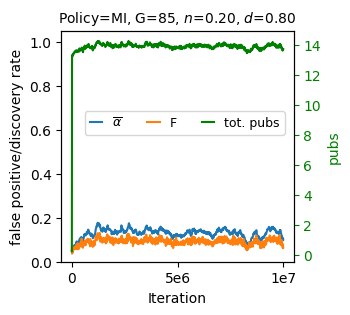

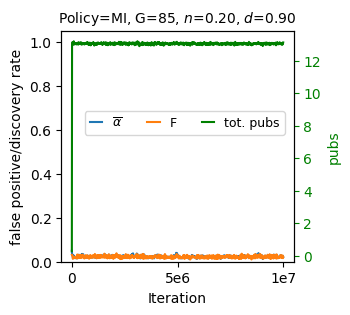

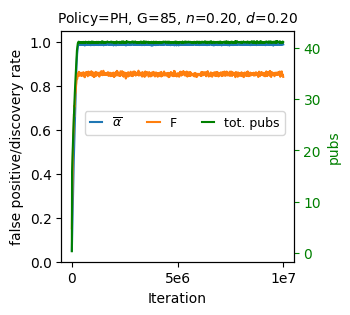

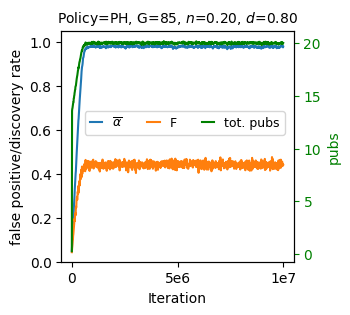

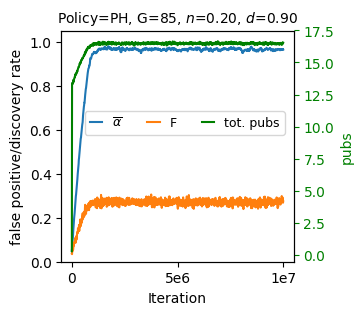

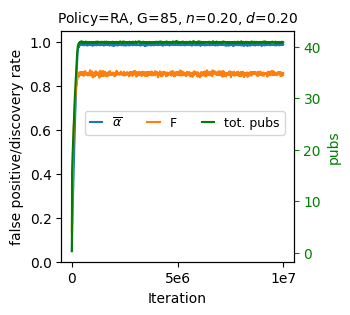

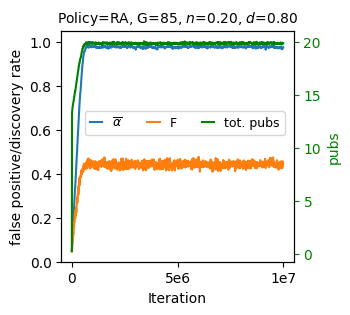

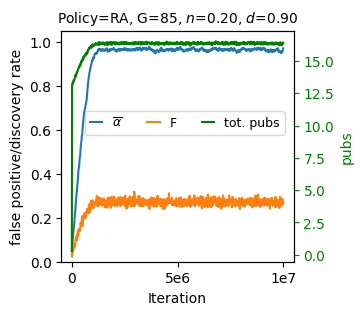

In [23]:
ed.hdf.close()
ed = ExperimentData('pubdata/sensitivity/scimod-wright-fisher.hdf')
heatmaps_and_convergence_check(ed, save_dir=os.path.join(figure_dir, 'TemporalDynamics')) 

# Best of ten random $b=0.5$

## False discovery rate and mean false positive rate

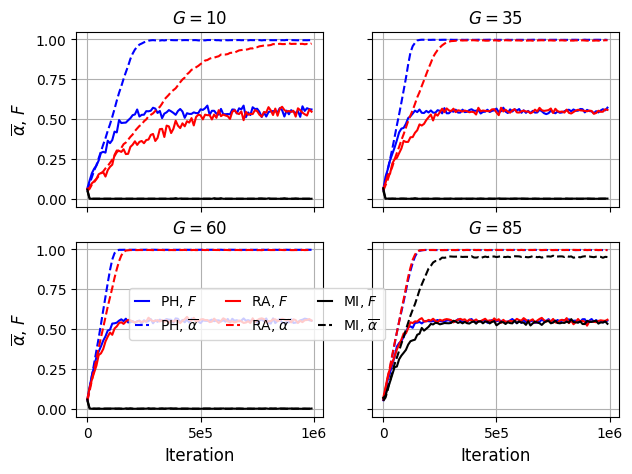

In [24]:
figure_dir = '/Users/mt/workspace/papers/sciencefunding/Figures/sensitivity-b=0.5/'

ed = ExperimentData('pubdata/sensitivity/scimod-baseRate0.5.hdf')
policies_timeseries(ed, 
    save_path=os.path.join(figure_dir, 'meas_v_time.pdf')
)

## Figures 3 and 4

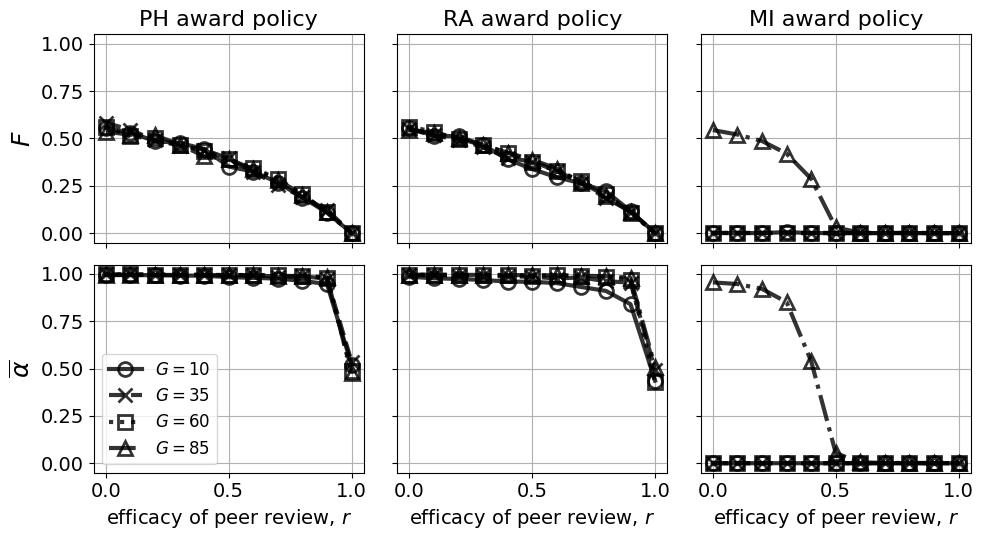

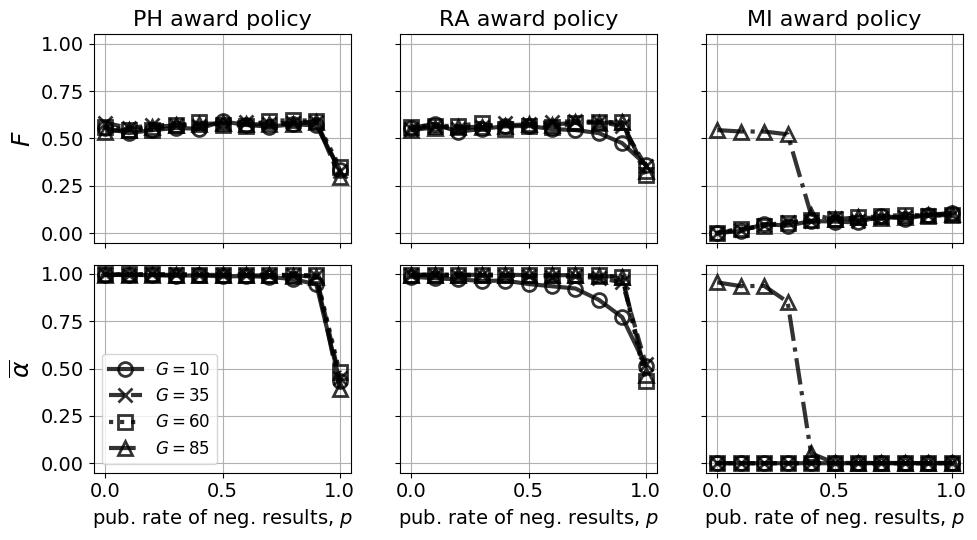

In [25]:
many_measure_vs_subparams(ed, 
    save_path=os.path.join(figure_dir, 'meas_v_fpdr.pdf')
)
many_measure_vs_subparams(ed, param='NPR', 
    save_path=os.path.join(figure_dir, 'meas_v_npr.pdf')
)

## Heatmaps

In [26]:
from vis import heatmaps

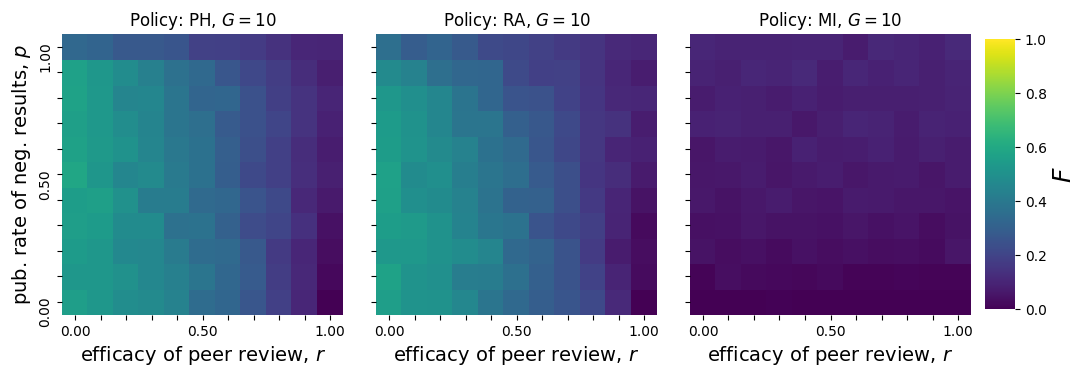

In [27]:
heatmaps(ed, '10', 
    save_path=os.path.join(figure_dir, 'heatmaps-10-fdr.pdf'), figsize=(10, 6)
)

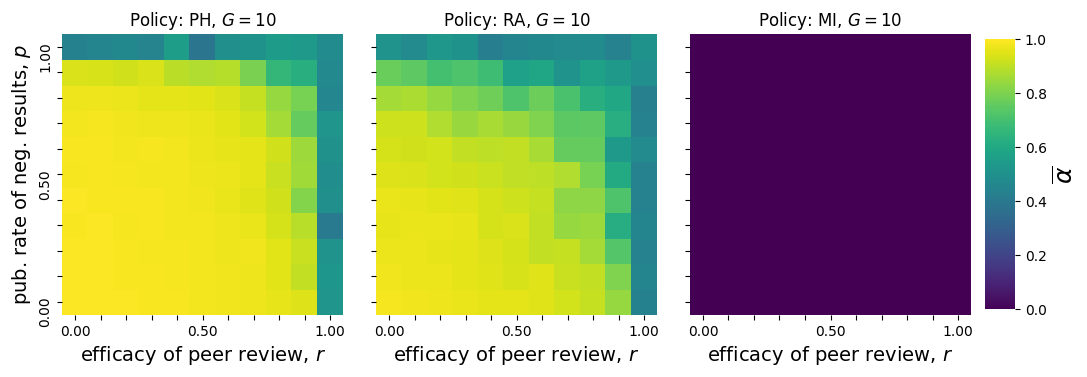

In [28]:
heatmaps(ed, '10', measure='falsePositiveRate',
    save_path=os.path.join(figure_dir, 'heatmaps-10-fpr.pdf'), figsize=(10, 6)
)

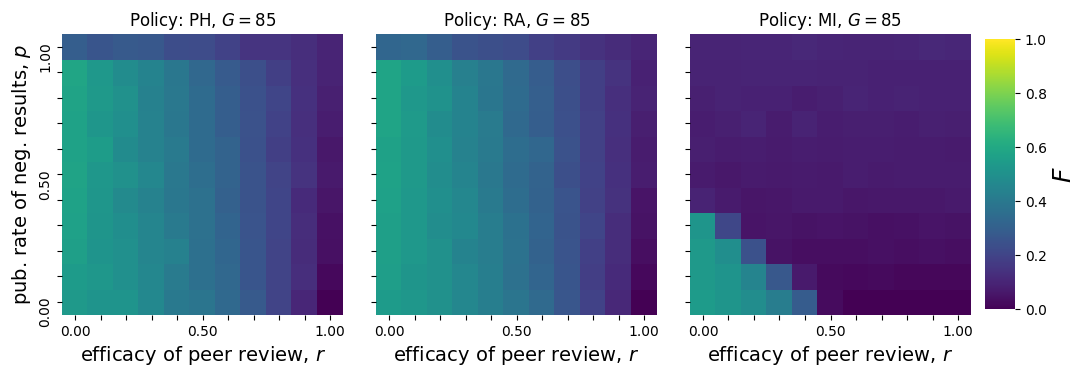

In [29]:
heatmaps(ed, '85', 
save_path=os.path.join(figure_dir, 'heatmaps-85-fdr.pdf'), figsize=(10, 6))

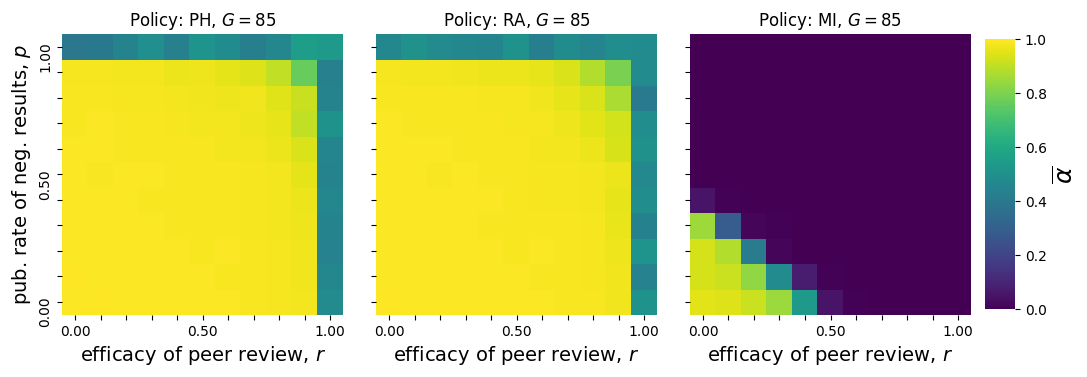

In [30]:
heatmaps(ed, '85', measure='falsePositiveRate',
save_path=os.path.join(figure_dir, 'heatmaps-85-fpr.pdf'), 
figsize=(10, 6))

## Number of publications decreases with $r$

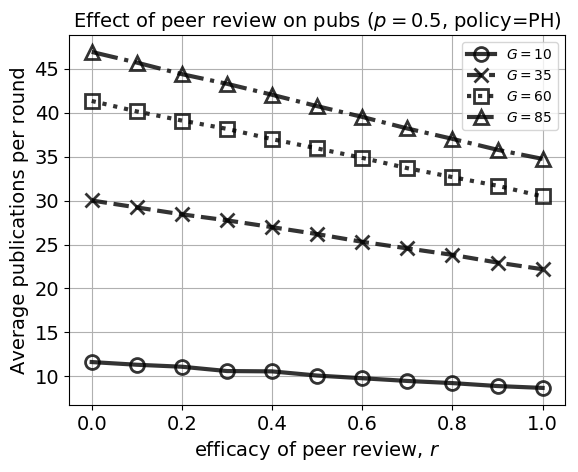

In [31]:
# policy = 'FPR'; award_amount = 10; pubneg_rate = '0.0'; fpdr = '0.10'
# measures = ed[policy, award_amount, pubneg_rate, fpdr]
# print(list(measures.keys()))

# mp = measures['meanPublications'][-1, :].mean()
from vis import measure_vs_pubparams
measure_vs_pubparams(ed, param='FPDR', 
                     measure='meanPublications', other_val='0.50')
plt.xlabel('')
plt.xticks(range(0, 11, 2), ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.xlabel(r'efficacy of peer review, $r$', size=14)
plt.legend()
plt.ylabel('Average publications per round', size=14)
plt.title(r'Effect of peer review on pubs ($p=0.5$, policy=PH)', size=14)
plt.savefig(os.path.join(figure_dir, 'pubs_v_peer-rev-eff-PH.pdf'))

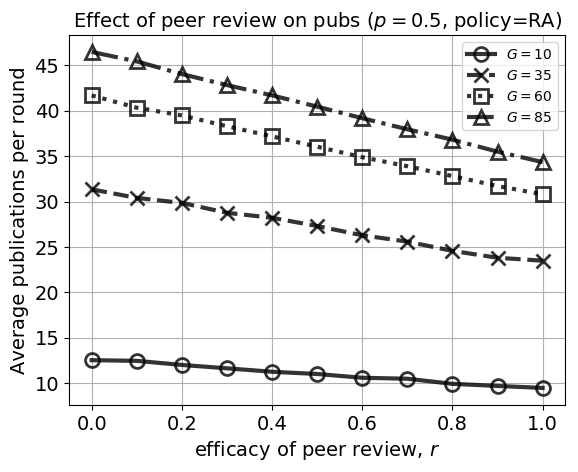

In [32]:
from vis import measure_vs_pubparams
measure_vs_pubparams(ed, param='FPDR', policy='RANDOM',
                     measure='meanPublications', other_val='0.50')
plt.xlabel('')
plt.xticks(range(0, 11, 2), ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.xlabel(r'efficacy of peer review, $r$', size=14)
plt.legend()
plt.ylabel('Average publications per round', size=14)
plt.title(r'Effect of peer review on pubs ($p=0.5$, policy=RA)', size=14)
plt.savefig(os.path.join(figure_dir, 'pubs_v_peer-rev-eff-RA.pdf'))

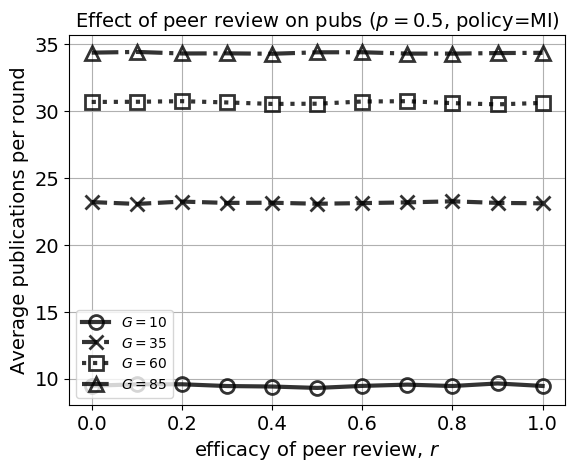

In [33]:
from vis import measure_vs_pubparams
measure_vs_pubparams(ed, param='FPDR', policy='FPR',
                     measure='meanPublications', other_val='0.50')
plt.xlabel('')
plt.xticks(range(0, 11, 2), ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.xlabel(r'efficacy of peer review, $r$', size=14)
plt.legend()
plt.ylabel('Average publications per round', size=14)
plt.title(r'Effect of peer review on pubs ($p=0.5$, policy=MI)', size=14)
plt.savefig(os.path.join(figure_dir, 'pubs_v_peer-rev-eff-MI.pdf'))

# Temporal Dynamics

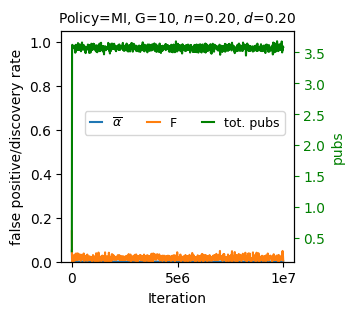

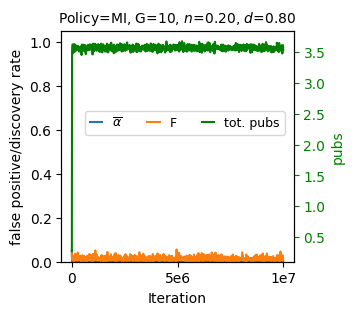

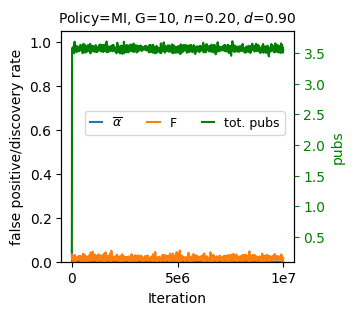

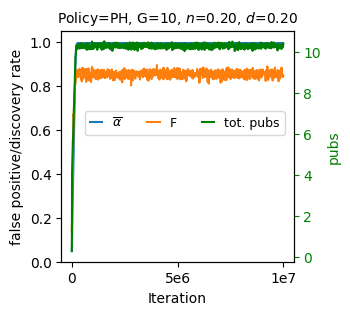

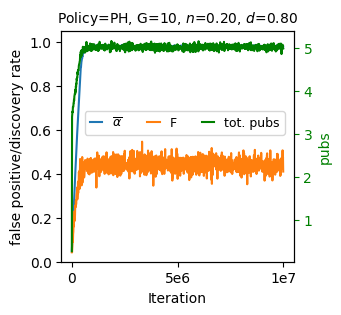

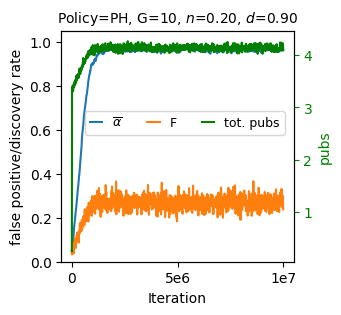

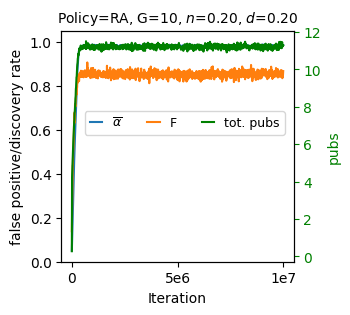

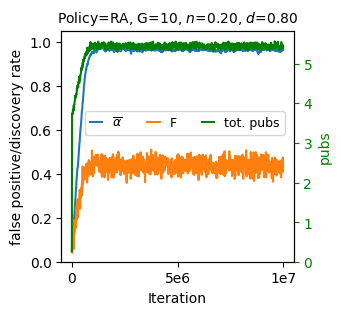

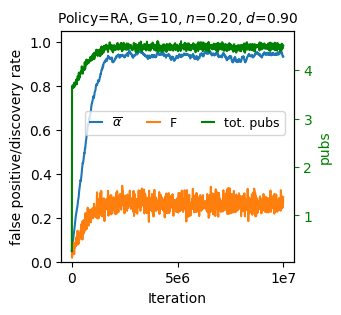

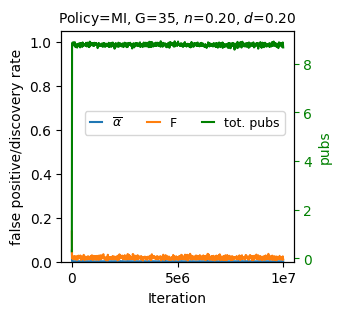

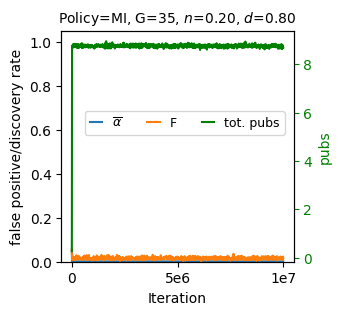

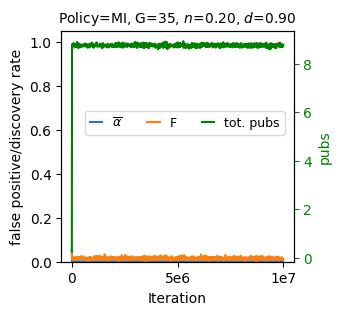

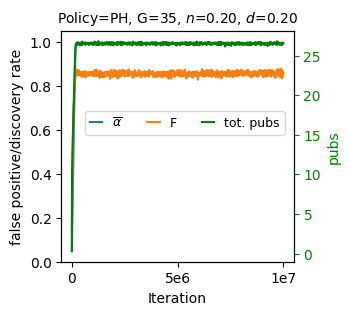

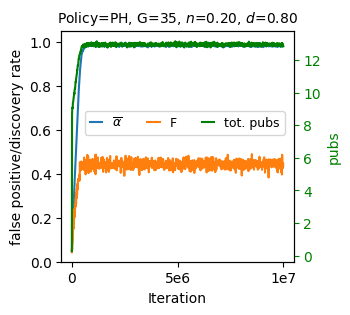

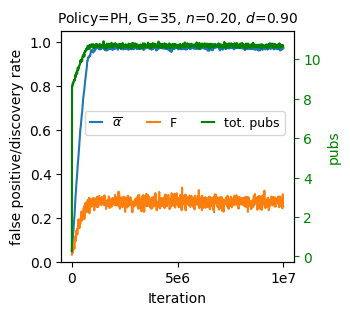

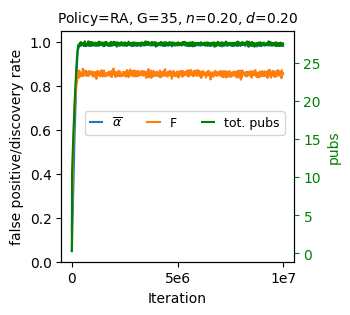

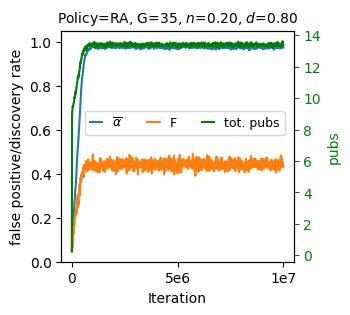

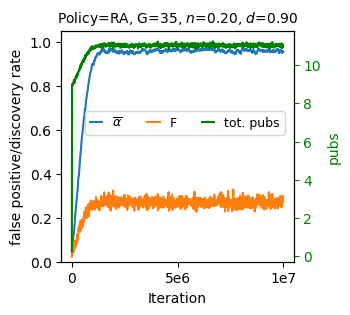

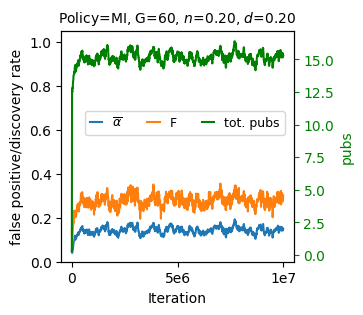

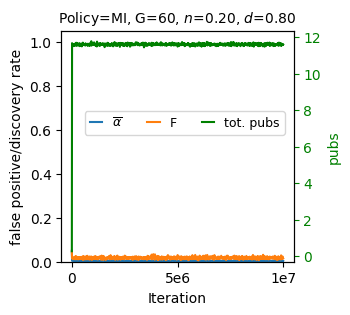

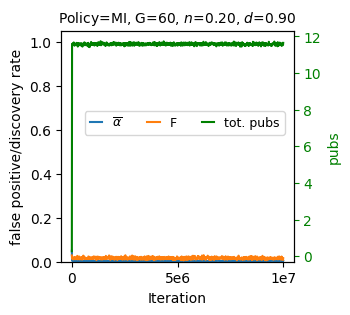

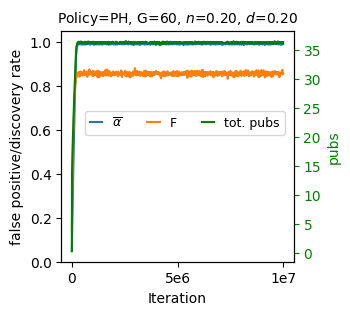

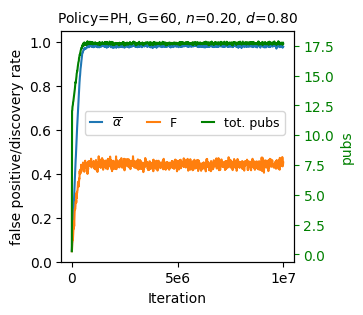

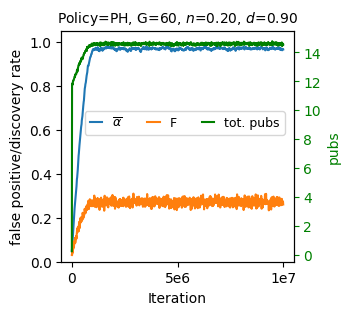

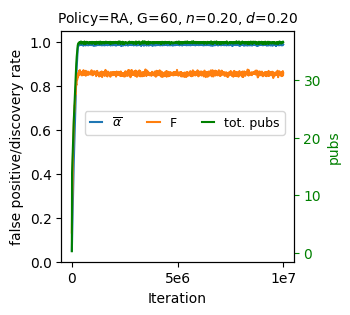

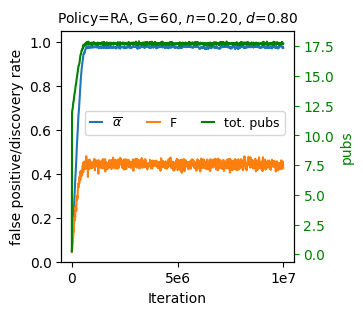

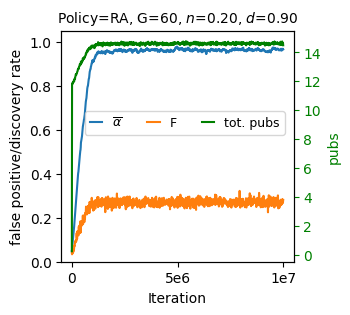

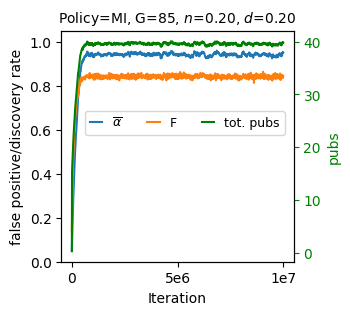

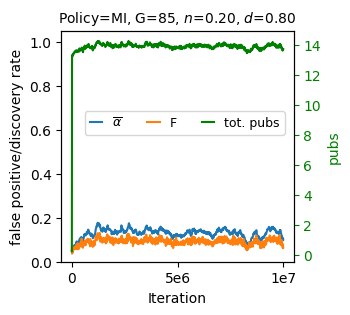

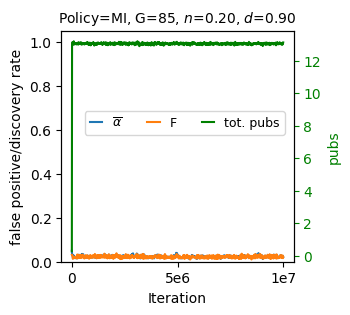

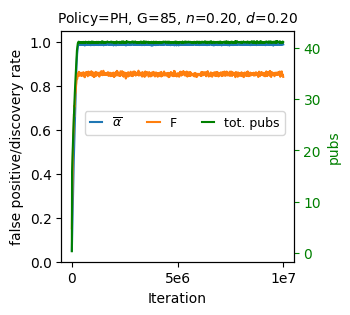

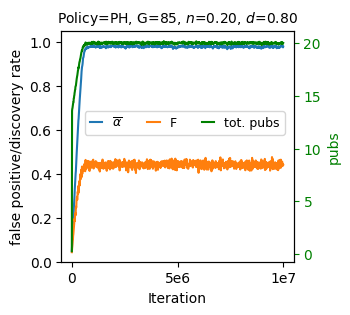

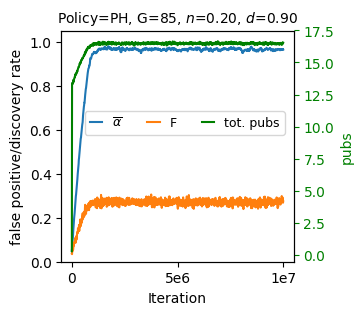

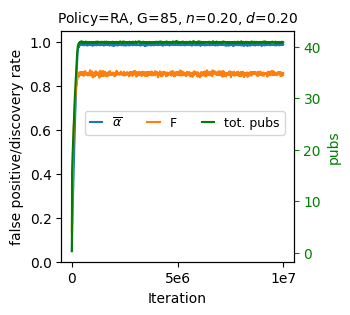

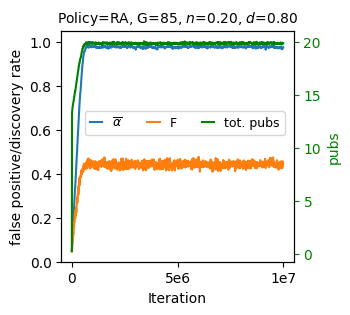

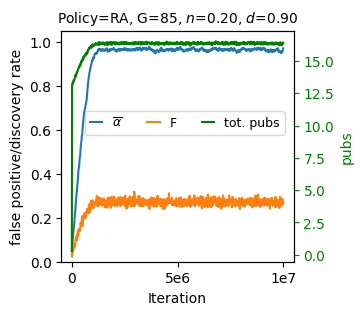

In [34]:
ed.hdf.close()
ed = ExperimentData('pubdata/sensitivity/scimod-wright-fisher.hdf')
heatmaps_and_convergence_check(ed, save_dir=os.path.join(figure_dir, 'TemporalDynamics')) 